## Usercase script - comparison SMASI and anomalies


### Processing SMASI

* Preprocessing (preprocessing.py)
    * Unreliable observations removed
    * Flagged observations removed
    * Temporal rematching
* Scaling (scaling.py)
    * all bands scaled to reference
    * CDF matching (linear CDF or least squares using ordered percentiles)
    * only if multiple sensors in input (scaling skipped for single input sensor)
* Standardization (standardization.py)
    * allows comparability of different bands
    * empirical distribution on based on 30 day window 
    * by band and sensor
    * CDF scaling parameters calculated to transform empiciral distribution to N(0,1)
    * repeated for all days of the year, independently for each band
* Merging (standardization.py)
    * merges standardized bands from all sensors
    * construct multivariate normal distriubtion from random samples (n=5000)
    * observations scaled to empirical distribution
    * transformed to unifrom distribution using PPF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from pytesmo.time_series import anomaly

### Import processed SMASI cell (.nc file)

In [40]:
# select gpi index
gpi_index = 10

Note: Gaps in timeseries are a result of preprocessing, where all rows with at least one nan value (from flagging or because no measurement was made) are dropped! 

e.g. gap from 04-2003 until 07-2003 results from flagged values of X- and C1-band being dropped


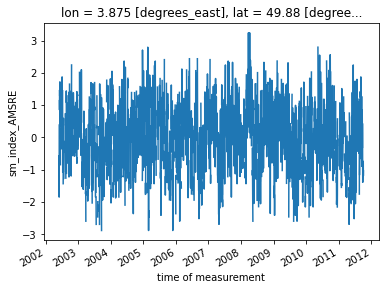

In [42]:
#lets import smasi nc file as xarray
smasi_amsre = xr.open_dataset(r'D:\data\output\smasi_combined\subprocess_multiple\AMSRE\1323.nc', engine = "netcdf4")

#shorten xarray to time period if wanted
#smasi_amsre= smasi_amsre.sel(time=slice("01-2003", "07-2003"))

#plot smasi (sm_index) of AMSRE
smasi_amsre.sm_index_AMSRE[gpi_index].plot()

print('Note: Gaps in timeseries are a result of preprocessing, where all rows with at least one nan value (from flagging or because no measurement was made) are dropped! \n')
print('e.g. gap from 04-2003 until 07-2003 results from flagged values of X- and C1-band being dropped')

### Import raw sensor data for comparison

here we can see the raw AMSRE values for cell 1323 gpi 798483. No gaps because no flagged bits were yet removed


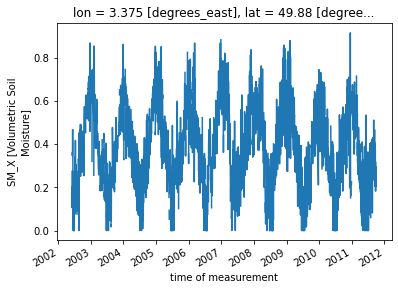

In [13]:
#lets import raw sensor data nc file as xarray
raw_amsre = xr.open_dataset(r'D:\data\input\LPRM\AMSRE_S3_VEGC\time_series\d\1323.nc', engine = "netcdf4")

#shorten xarray to time period if wanted
#raw_amsre = raw_amsre.sel(time=slice("01-2003", "01-2004"))

#plot raw amsre X-band data
raw_amsre.SM_X[gpi_index].plot()
print('here we can see the raw AMSRE values for cell 1323 gpi 798483. No gaps because no flagged bits were yet removed')

Here we can see the raw AMSRE values for cell 1323 gpi 798483. No gaps because no flagged bits were yet removed


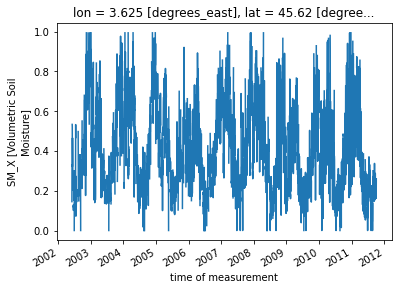

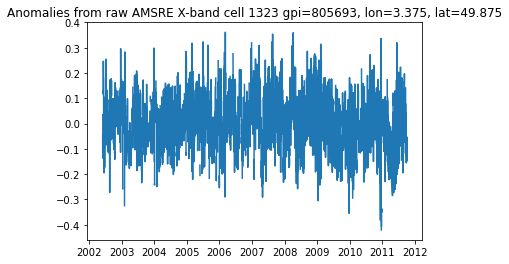

In [14]:
# import raw sensor data AMSRE
raw_data = xr.open_dataset(r'D:\data\input\LPRM\AMSRE_S3_VEGC\time_series\d\1323.nc', engine = "netcdf4")

#shorten xarray to time period if wanted
#raw_data = raw_data.sel(time=slice("01-2003", "01-2004"))

# determine info of gpi
gpi = raw_data.location_id[gpi_index].values
lon = raw_data.locations[gpi_index].lon.values
lat = raw_data.locations[gpi_index].lat.values

#plot raw amsre X-band data
print('Here we can see the raw AMSRE values for cell 1323 gpi 798483. No gaps because no flagged bits were yet removed')
raw_data.SM_X[350].plot()
plt.show()


# calculate anomalies for gpi from raw sensor data AMSRE X-band
# SM_X[99] is the data from the 99th gpi in cell 1323
# I processed the 99th gpi in smasi code (0-400 gpis per cell)
ser = pd.Series(raw_data.SM_X[gpi_index], index=raw_data.SM_X[gpi_index]['time'])
climatology = anomaly.calc_climatology(ser)
anom = anomaly.calc_anomaly(ser, climatology=climatology)

# plot anomalies from sensor AMSRE X-band
plt.plot(anom.index, anom)
plt.title(f'Anomalies from raw AMSRE X-band cell 1323 gpi={gpi}, lon={lon}, lat={lat}')
plt.show()

### Import CCI combined data and compare anomalies

Text(0.5, 1.0, 'Anomalies from CCI combined cell 1323 gpi={gpi}, lon={lon}, lat={lat}')

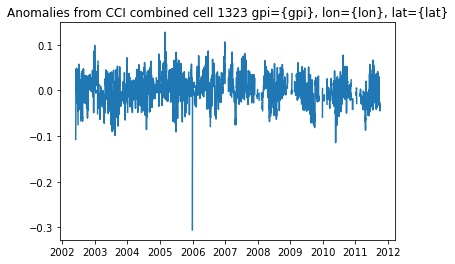

In [15]:
# import CCI combined sm and shorten to extent of sensor we used before for comparison
raw_data_cci = xr.open_dataset(r'D:\data\input\063_images_to_ts\combined\1323.nc', engine = "netcdf4")
raw_data_cci = raw_data_cci.sel(time=slice(raw_data.time.min().values, raw_data.time.max().values))

# determine info of gpi
gpi = raw_data.location_id[gpi_index].values
lon = raw_data.locations[gpi_index].lon.values
lat = raw_data.locations[gpi_index].lat.values

# calculate anomalies for gpi from cci combined
ser = pd.Series(raw_data_cci.sm[gpi_index], index=raw_data_cci.sm[gpi_index]['time'])
climatology = anomaly.calc_climatology(ser)
anom_cci = anomaly.calc_anomaly(ser, climatology=climatology)

# plot cci anomalies
plt.plot(anom_cci.index, anom_cci)
plt.title('Anomalies from CCI combined cell 1323 gpi={gpi}, lon={lon}, lat={lat}')

### Calculate mean from multiple gpis
* go through all gpis and check which have data
* remove gpis with no data
* concatenate all xr DataSets and plot the mean

In [20]:
# define range of gpis to calculate mean from

r = range(0,10)

index:  0


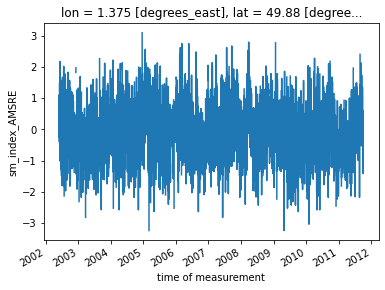

index:  1


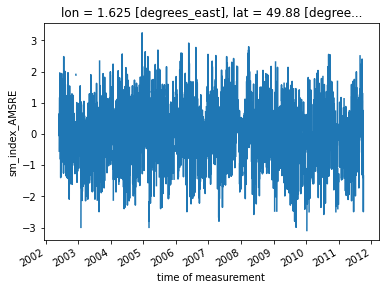

index:  2


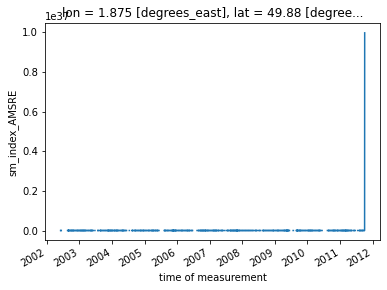

index:  3


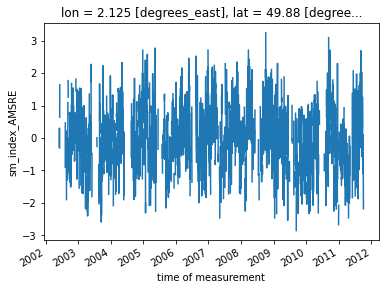

index:  4


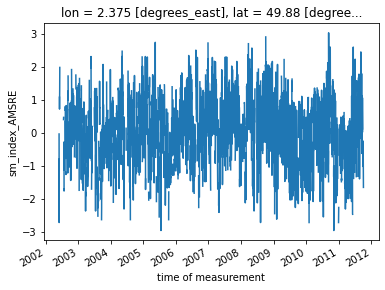

index:  5


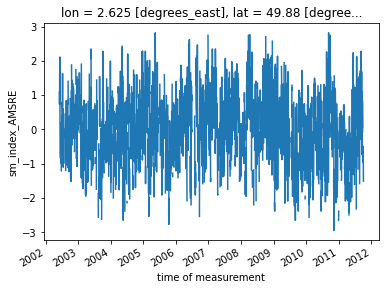

index:  6


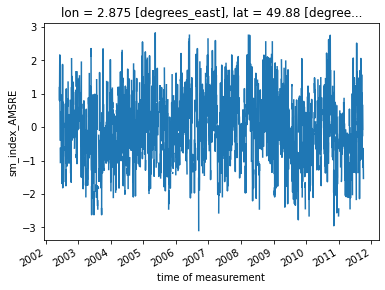

index:  7


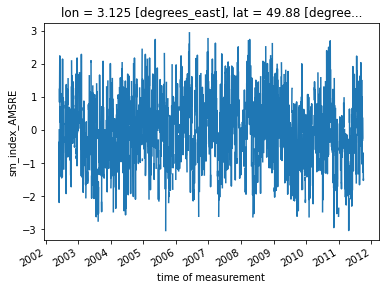

index:  8


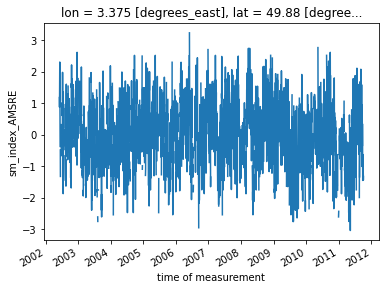

index:  9


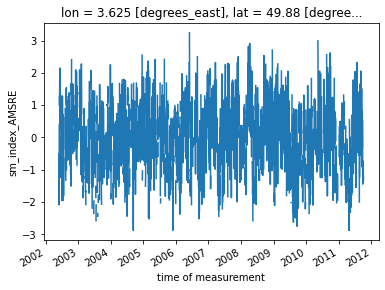

index:  10


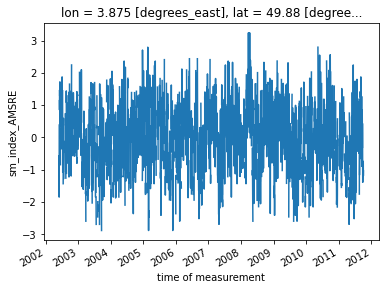

index:  11


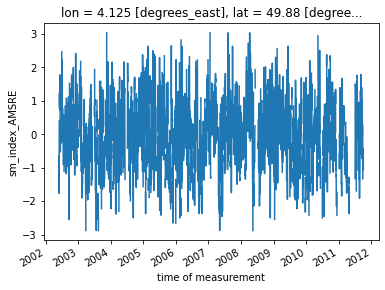

index:  12


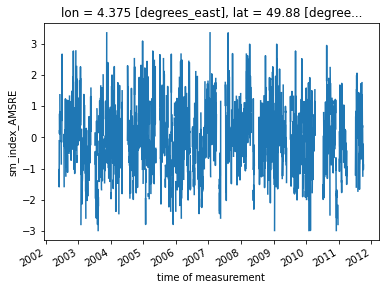

index:  13


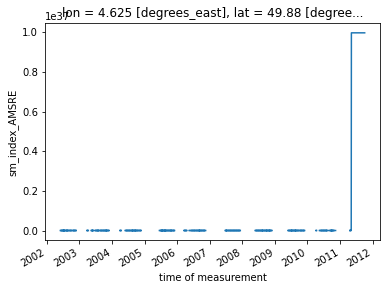

index:  14


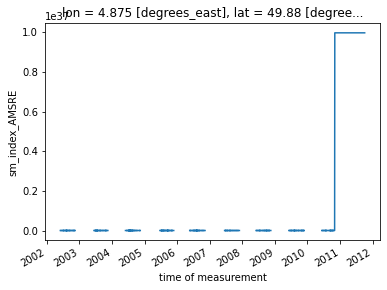

index:  15


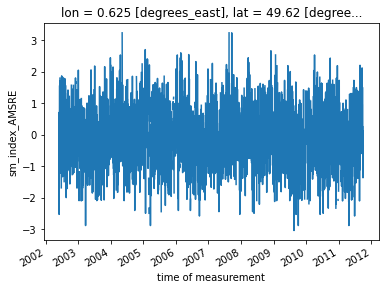

index:  16


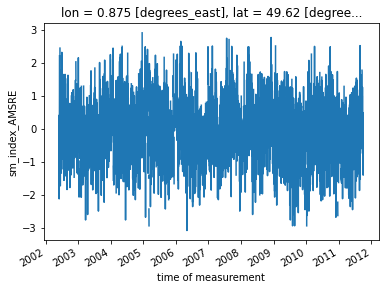

index:  17


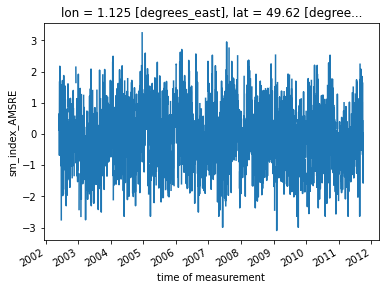

index:  18


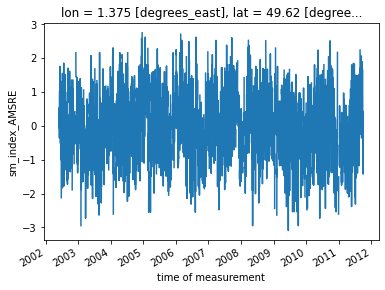

index:  19


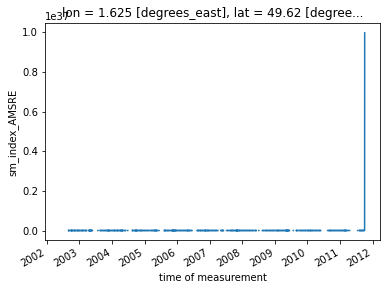

index:  20


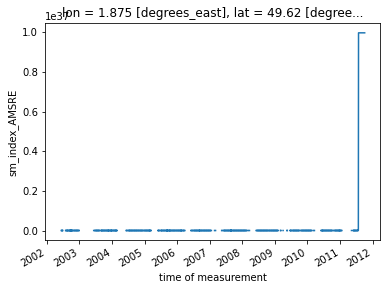

index:  21


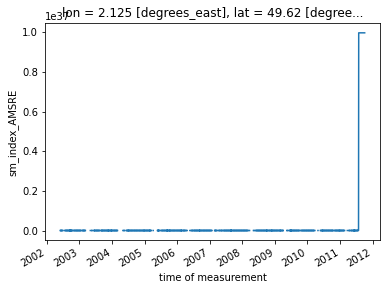

index:  22


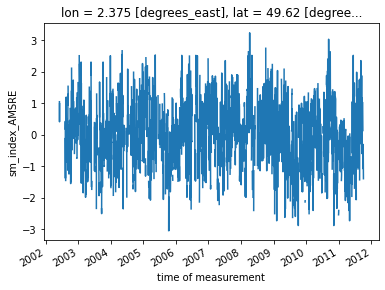

index:  23


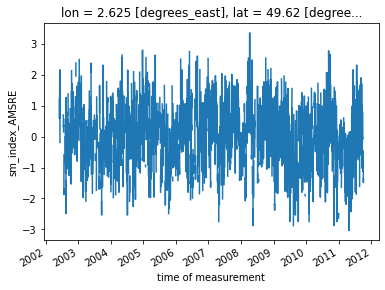

index:  24


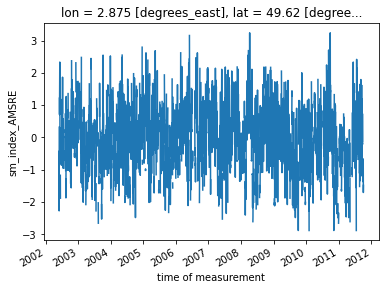

index:  25


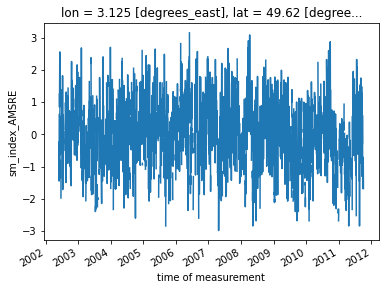

index:  26


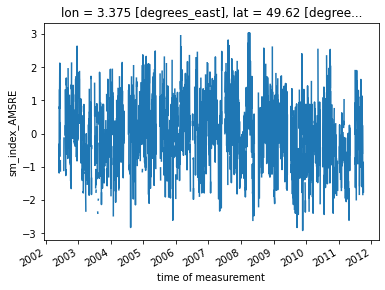

index:  27


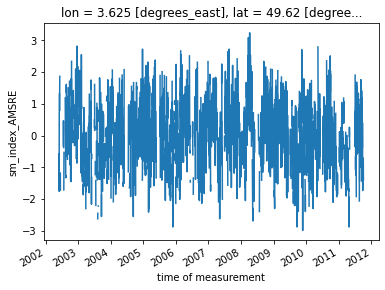

index:  28


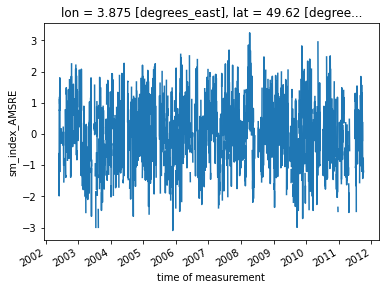

index:  29


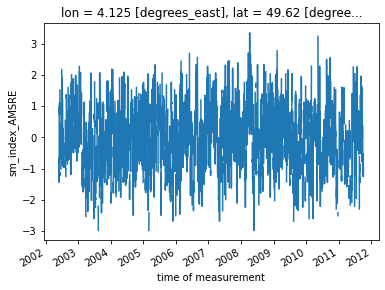

index:  30


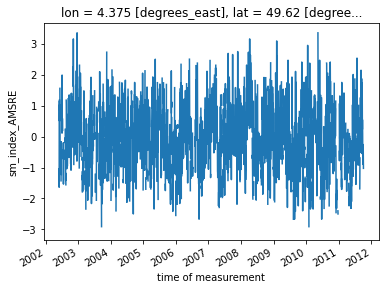

index:  31


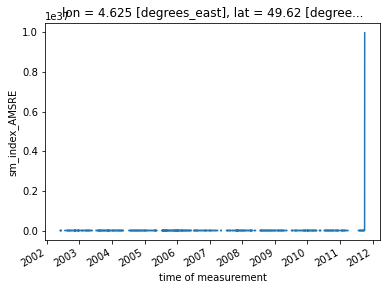

index:  32


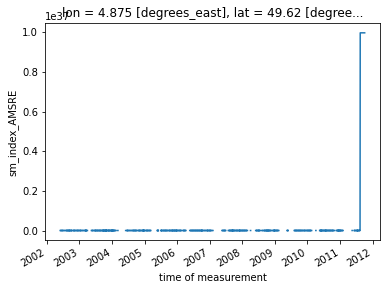

index:  33


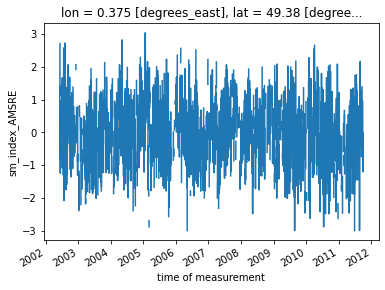

index:  34


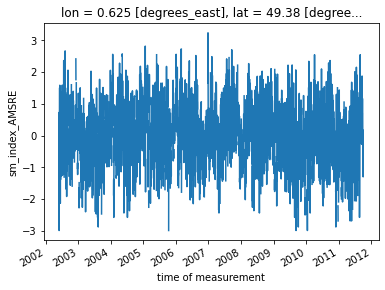

index:  35


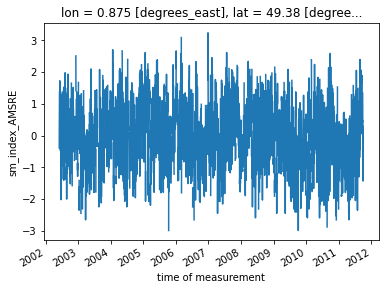

index:  36


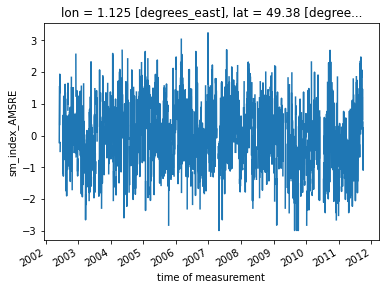

index:  37


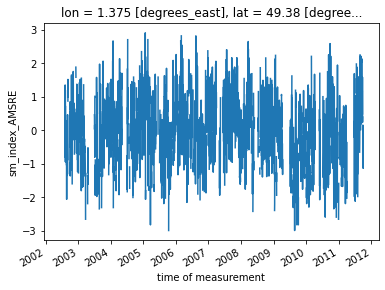

index:  38


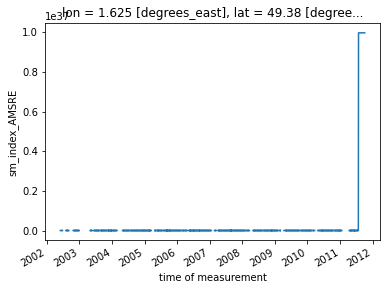

index:  39


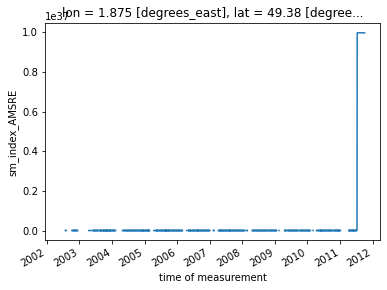

index:  40


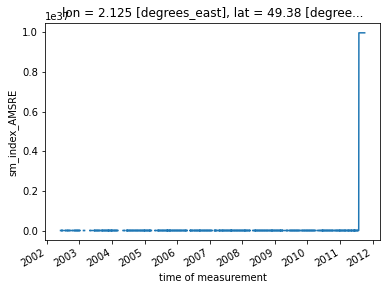

index:  41


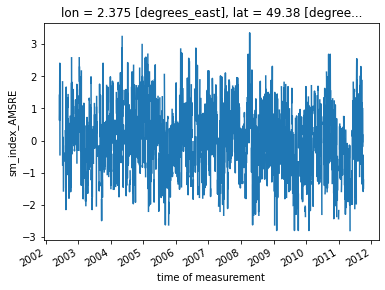

index:  42


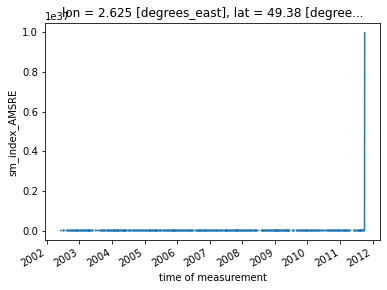

index:  43


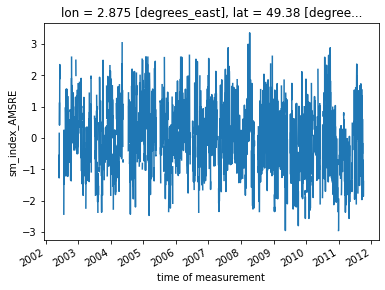

index:  44


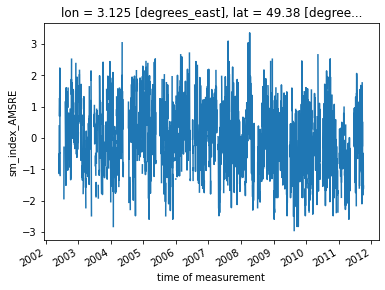

index:  45


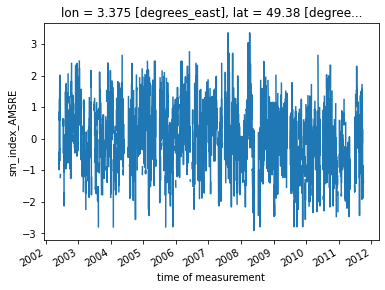

index:  46


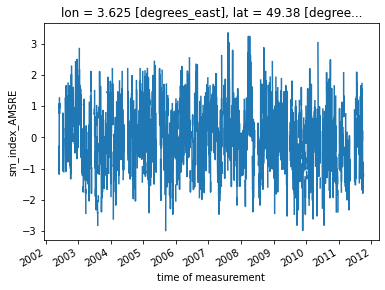

index:  47


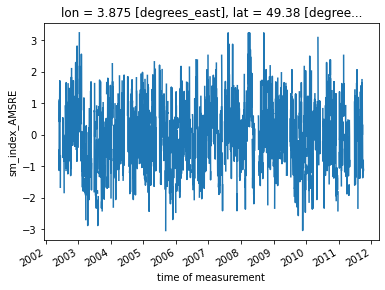

index:  48


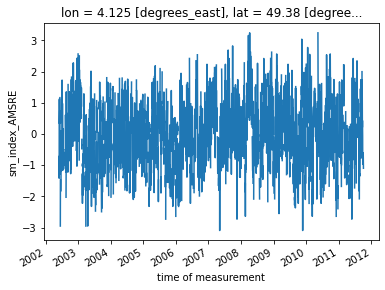

index:  49


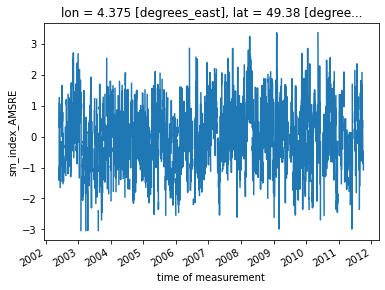

index:  50


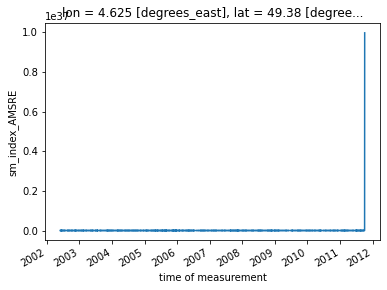

index:  51


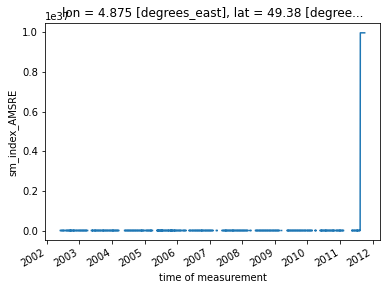

index:  52


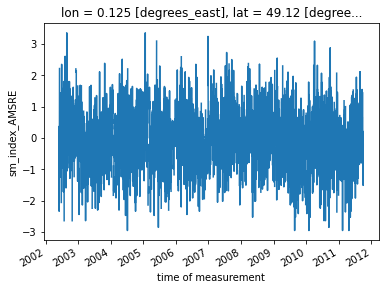

index:  53


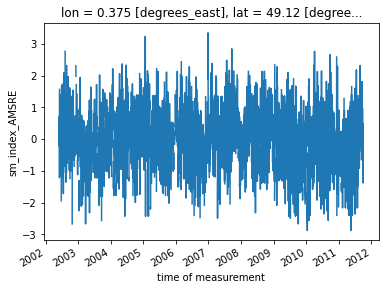

index:  54


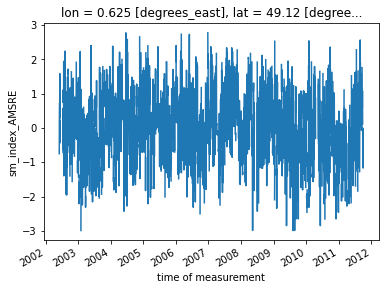

index:  55


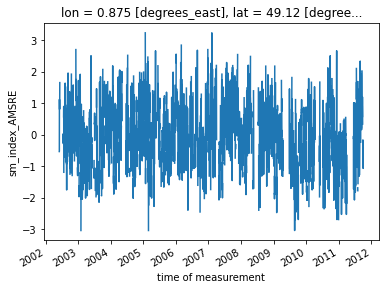

index:  56


KeyboardInterrupt: 

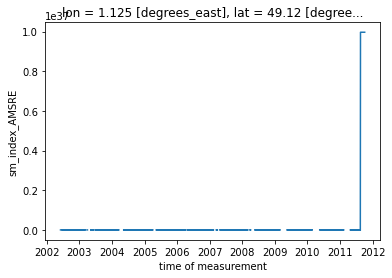

In [21]:
# plot all gpis of a cell and check which have data and which don't
smasi_amsre_tot = xr.open_dataset(r'D:\data\output\smasi_combined\subprocess_multiple\AMSRE\1323.nc', engine = "netcdf4")
for i in r:
    print('index: ',i)
    smasi_amsre_tot.sm_index_AMSRE[i].plot()
    plt.show()

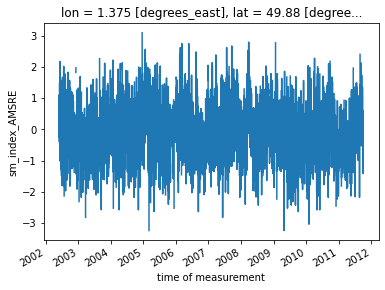

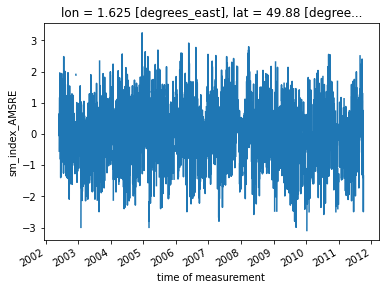

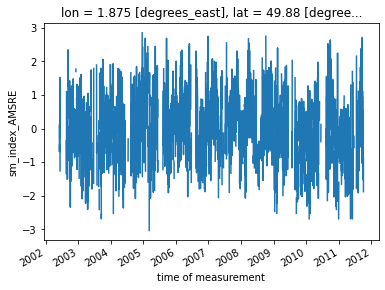

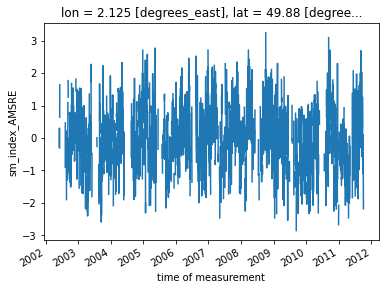

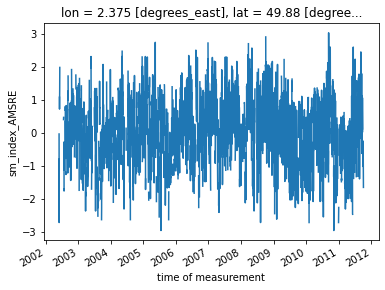

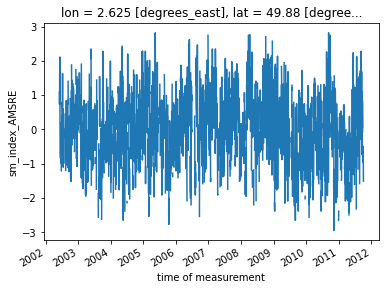

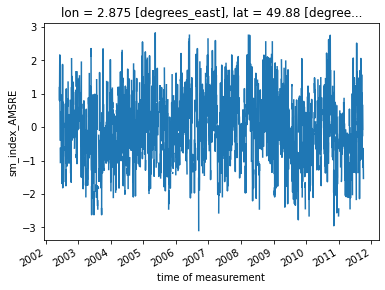

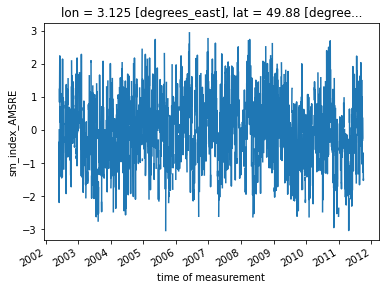

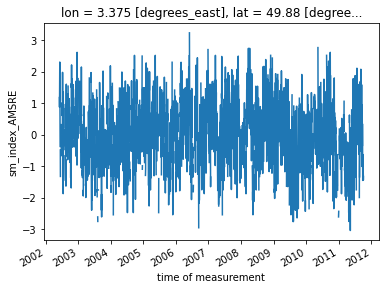

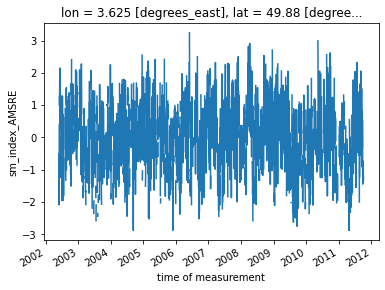

In [18]:
l = []
for i in r:
    
    # filter out all gpis filled with nan 9.96920997e+36 values (these an artifacts from the smasi code...)
    ds_masked = smasi_amsre_tot.sm_index_AMSRE[i].where(smasi_amsre_tot.sm_index_AMSRE[i] < 9.96920997e+35)
    
    l.append(ds_masked)
    ds_masked.plot()
    plt.show() #check for consistency and outliers
    
merged = xr.concat([i for i in l], 'locations')

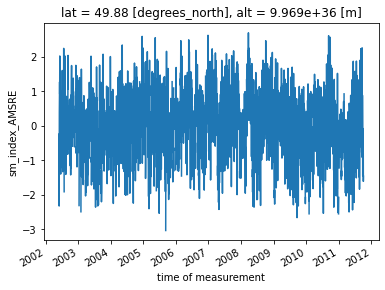

In [19]:
# calculate mean of all gpis (more consistent smasi index, less likely to have gaps)
merged.mean(dim='locations').plot()